<a href="https://colab.research.google.com/github/kim-jinseop/Machine-Deep_learning/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0,
                29.7, 29.7, 30.0, 30.0, 30.7, 
                31.0, 31.0, 31.5, 32.0, 32.0,
                32.0, 33.0, 33.0, 33.5, 33.5, 
                34.0, 34.0, 34.5, 35.0, 35.0, 
                35.0, 35.0, 36.0, 36.0, 37.0, 
                38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 
                450.0, 500.0, 390.0, 450.0, 500.0, 
                475.0, 500.0, 500.0, 340.0, 600.0,
                600.0, 700.0, 700.0, 610.0, 650.0, 
                575.0, 685.0, 620.0, 680.0, 700.0, 
                725.0, 720.0, 714.0, 850.0, 1000.0, 
                920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight


import numpy as np
fish_data = np.column_stack((fish_length, fish_weight)) #전달 받은 리스트를 일렬로 세운다음 나란히 연결
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

#훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split
#stratify -> 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

print(train_input.shape, test_input.shape) #shape 입력데이터 크기
print(test_target)

(36, 2) (13, 2)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

#데이터시각화

1.0

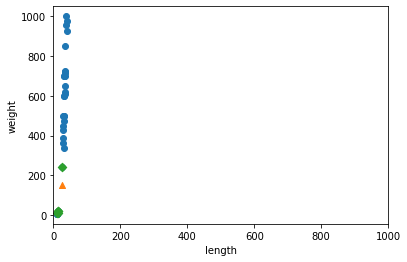

In [ ]:
import matplotlib.pyplot as plt

distance, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

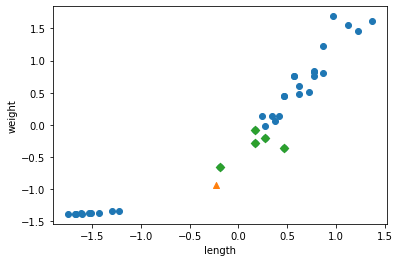

[1.]


In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis =0)

distance, indexes = kn.kneighbors([new])
train_scaled = (train_input - mean) / std
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))